STEP 1: DATA LOADING AND INSPECTION
---------------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

In [3]:
telecom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
telecom.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
#Shape of the dataframe
print("The number of rows: {}".format(telecom.shape[0]))

print("The number of columns:{}".format(telecom.shape[1]))

The number of rows: 3333
The number of columns:21


In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
telecom.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
print(telecom['churn'].value_counts())

churn
False    2850
True      483
Name: count, dtype: int64


In [9]:
#Check the discriptive statistics
telecom.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


STEP 2: DATA CLEANING
-------------------------

In [10]:
#Checking for missing values
telecom.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
#Checking for duplictes
telecom.duplicated().sum()

0

In [12]:
# Get all columns from the dataset
all_columns = telecom.columns.tolist()  # Extract all column names from the dataset

# Predefined categorical variables and target
categorical_vars = ['state', 'international plan', 'voice mail plan', 'area code']
target = ['churn']
# Dynamically identify numerical variables as the rest
numerical_vars = [col for col in telecom.columns if col.strip().lower() not in [c.lower() for c in categorical_vars + target]]
# Define light blue color for text
light_blue = '\033[94m'
reset_color = '\033[0m'

# Print the results for confirmation with counts and colored titles
print(f"{light_blue}Categorical Variables ({len(categorical_vars)}):{reset_color}", categorical_vars)
print(f"{light_blue}Target Variable ({len(target)}):{reset_color}", target)
print(f"{light_blue}Numerical Variables ({len(numerical_vars)}):{reset_color}", numerical_vars)

Categorical Variables (4): ['state', 'international plan', 'voice mail plan', 'area code']
Target Variable (1): ['churn']
Numerical Variables (16): ['account length', 'phone number', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [13]:
#Checking for duplicates
telecom.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [14]:
telecom.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

2.1 OUTLIERS DETECTION
-------------

In [15]:
#Detecting outlier using IQR (Interquartile Range)
numeric_data = telecom.select_dtypes(include=['number'])

#Calculate the first and third quartile
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

#Calculate the interquartile range (IQR)
IQR = Q3 - Q1
#Detect Outlier
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()


print(outliers.T)

account length             18
area code                   0
number vmail messages       1
total day minutes          25
total day calls            23
total day charge           25
total eve minutes          24
total eve calls            20
total eve charge           24
total night minutes        30
total night calls          22
total night charge         30
total intl minutes         46
total intl calls           78
total intl charge          49
customer service calls    267
dtype: int64


In [16]:
#Calculate skewness for all  numerical columns
skewness = telecom.select_dtypes(include=['number']).skew()
#Display the skewness values
print(skewness)

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
dtype: float64


STEP 3: EXPLORATORY DATA ANALYSIS
----------------

In [17]:
#Calculating the % of International plans
telecom['international plan'].value_counts(normalize=True)

international plan
no     0.90309
yes    0.09691
Name: proportion, dtype: float64

In [18]:
#Calculating the % of International plans
telecom['voice mail plan'].value_counts(normalize=True)

voice mail plan
no     0.723372
yes    0.276628
Name: proportion, dtype: float64

In [19]:
#Calculating the % of churn
telecom['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

In [20]:
#Calculating the % of area code
telecom['area code'].value_counts(normalize=True)

area code
415    0.496550
510    0.252025
408    0.251425
Name: proportion, dtype: float64

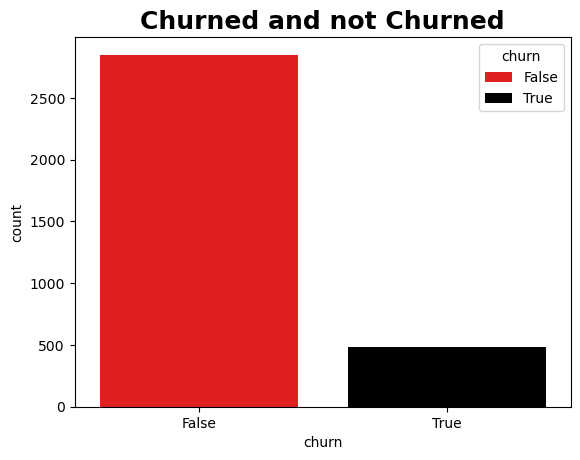

In [21]:
#Target Variable Distribution
sns.countplot(x = 'churn', data=telecom, hue= "churn", palette=('Red', 'black'))
plt.title('Churned and not Churned', size=18, color='black', fontweight= 'bold')
plt.show()

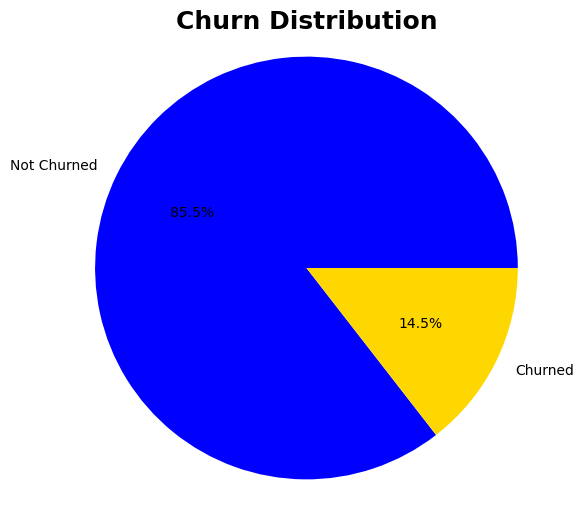

In [22]:
#Visualizing the churn distribution
#Create the pie chart
fig = plt.figure(figsize=(6,6))
colors = ['blue', 'gold']
plt.title('Churn Distribution', size=18, color='black', fontweight= 'bold' )
plt.pie(telecom['churn'].value_counts(), labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')
#Show the plot
plt.show()

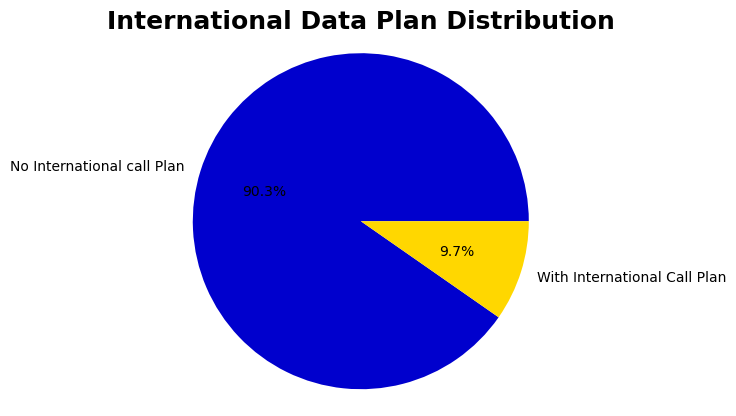

In [23]:
# Visualizing the data plan distribution
# Creating a pie chart
colors = ['mediumblue', 'gold'] 
plt.title('International Data Plan Distribution', size=18, color='black', fontweight= 'bold')
plt.pie(telecom['international plan'].value_counts(),labels=['No International call Plan','With International Call Plan'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the plot
plt.show()

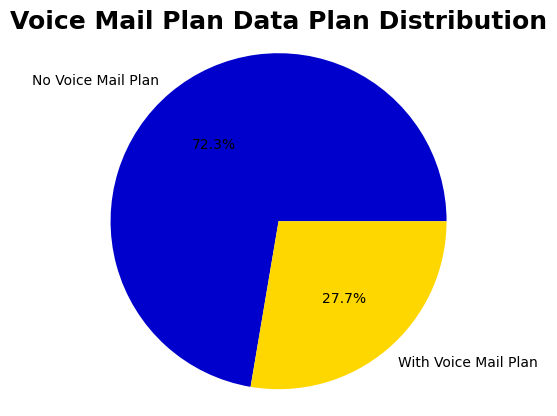

In [24]:
# Visualizing the data plan distribution
# Creating a pie chart
colors = ['mediumblue', 'gold'] 
plt.title('Voice Mail Plan Data Plan Distribution', size=18, color='black', fontweight= 'bold')
plt.pie(telecom['voice mail plan'].value_counts(),labels=['No Voice Mail Plan','With Voice Mail Plan'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the plot
plt.show()

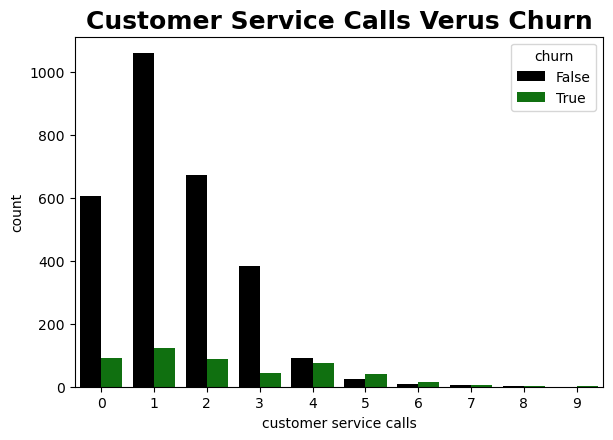

In [25]:
#Histrogram plots to show  distribution of customer with international plan with respect to churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=telecom['customer service calls'],hue= telecom['churn'], palette=("black", "green"))
plt.title("Customer Service Calls Verus Churn", size=18, color='black', fontweight= 'bold')

plt.show()

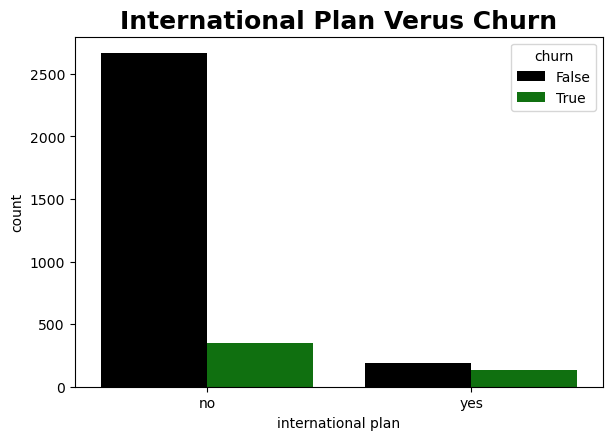

In [26]:
#Histrogram plots to show  distribution of customer with international plan with respect to churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=telecom['international plan'],hue= telecom['churn'], palette=("black", "green"))
plt.title("International Plan Verus Churn", size=18, color='black', fontweight= 'bold')

plt.show()

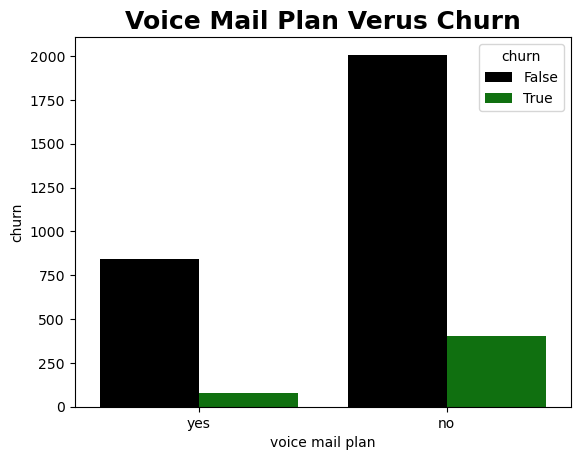

In [27]:
#Histrogram plots to show distribution of customers with Voice Mail Plan with respect to Churn
sns.countplot(x=telecom['voice mail plan'],hue= telecom['churn'], palette=("black", "green"))
plt.title("Voice Mail Plan Verus Churn", size=18, color='black', fontweight= 'bold')
plt.xlabel('voice mail plan')
plt.ylabel('churn')
plt.show()

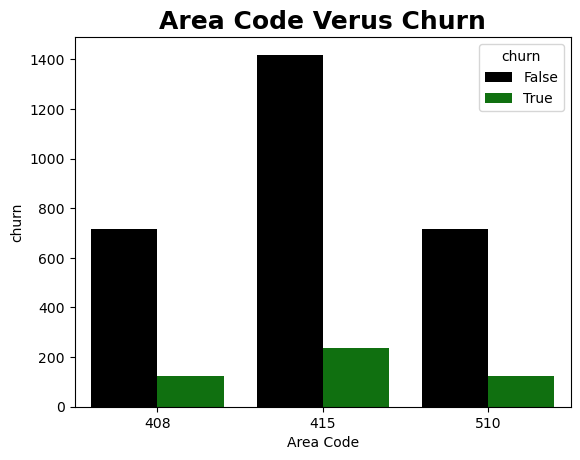

In [28]:
#Histrogram plots to show distribution of customers with Area Code with respect to Churn
sns.countplot(x=telecom['area code'],hue= telecom['churn'], palette=("black", "green"))
plt.title("Area Code Verus Churn", size=18, color='black', fontweight= 'bold')
plt.xlabel('Area Code')
plt.ylabel('churn')
plt.show()

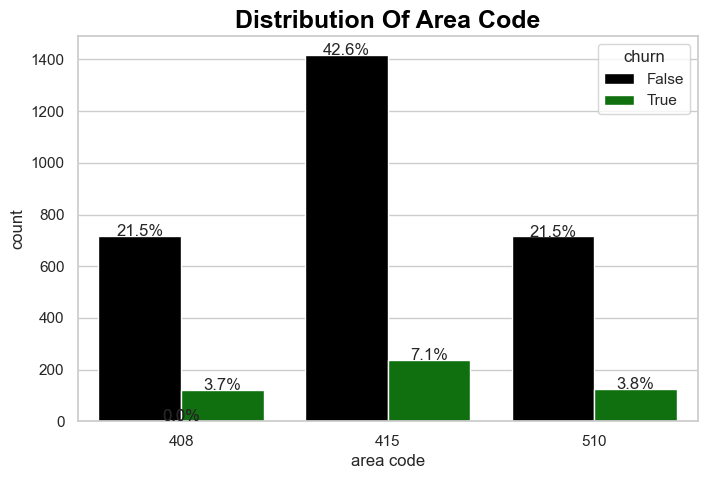

In [29]:
telecom['area code'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = (len(telecom))

ax = sns.countplot(x= "area code", hue='churn', data=telecom, palette=("black", "green", "red"))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center')
    plt.title('Distribution Of Area Code', fontweight='bold', size= 18, color='black')
    #plt.show()

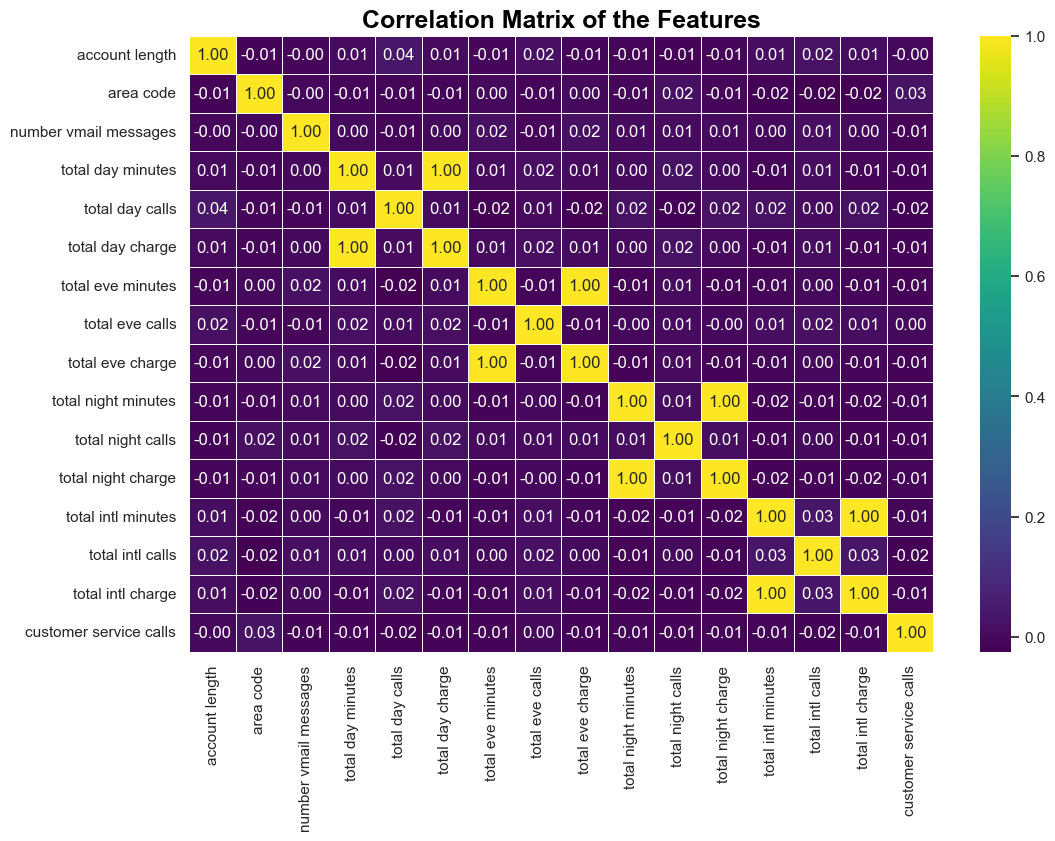

In [30]:
# Visualizing the correlation matrix
#le = LabelEncoder()
#telecom['churn']= le.fit_transform(telecom['churn'])
# Select only numeric columns for correlation calculation
numeric_data = telecom.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of the Features", size=18, fontweight='bold', color='black')
plt.show()


In [31]:
correlation_matrix

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


In [32]:
#Calculating the % of International plans
telecom['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

STEP 4: Data Preprocessing
----------------
4.1 Encoding
-----------------

In [33]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

In [34]:
#Check the discriptive statistics
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
international plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
voice mail plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91


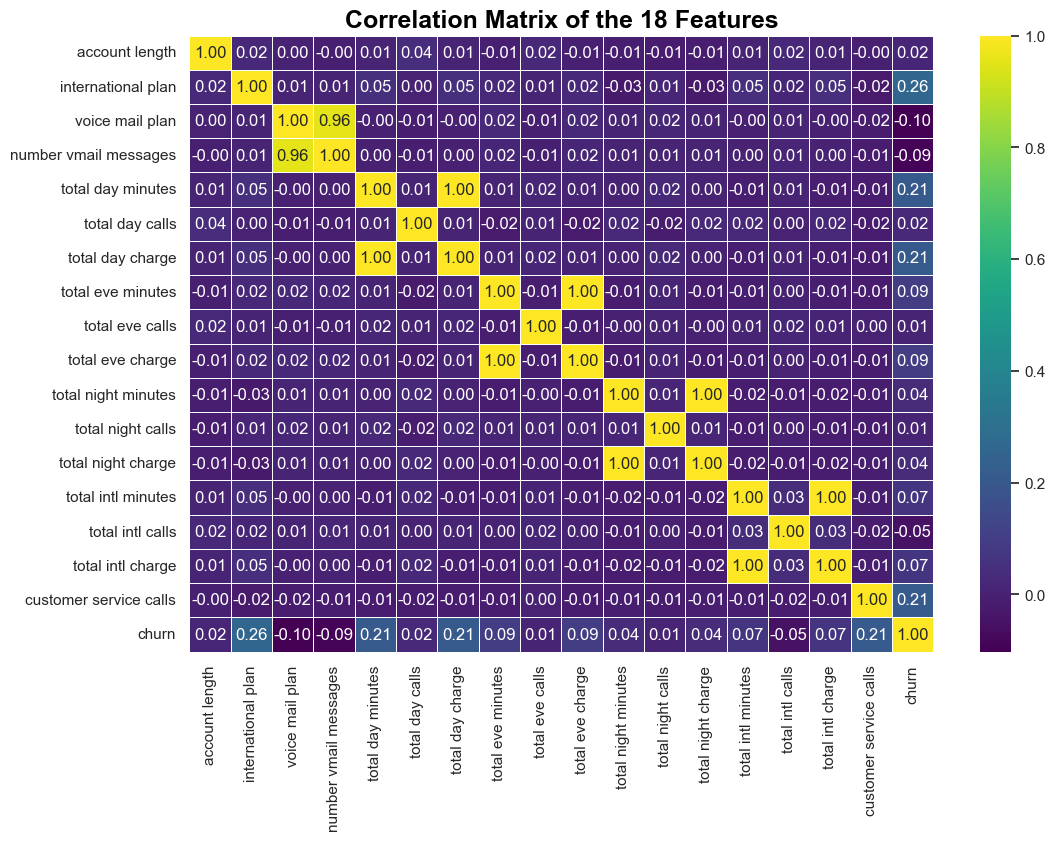

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


In [35]:
# Select only numeric columns for correlation calculation
numeric_data = df1.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of the 18 Features", size=18, fontweight='bold', color='black')
plt.show()


churn_correlation=correlation_matrix['churn'].sort_values(ascending=False)
print(churn_correlation)

4.2 FEATURES SCALING / STANDARDIZATION
--------------------

In [36]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

df1.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.524793,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0


In [37]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


Imbalanced class distribution:
 churn
0.0    2338
1.0     395
Name: count, dtype: int64


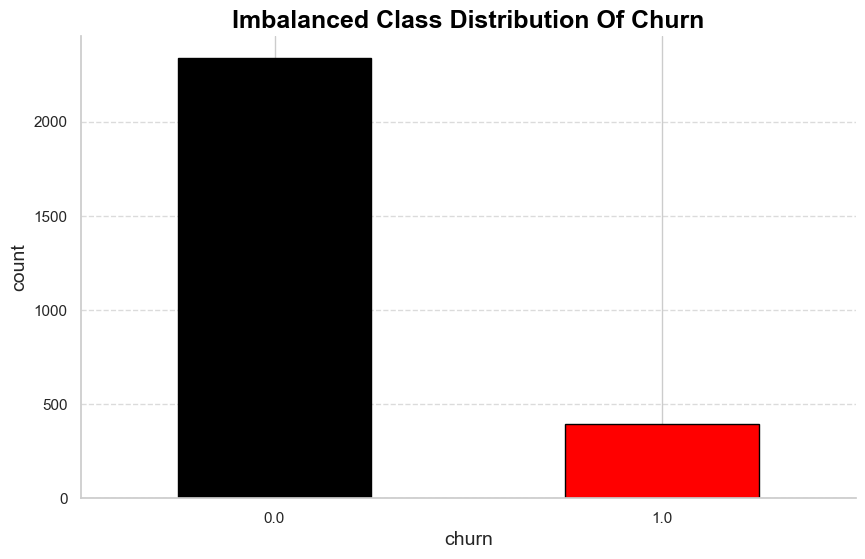

In [38]:
#Verify the Imbalanced class distribution
imbalanced_class_counts = pd.Series(y_train).value_counts()
print("Imbalanced class distribution:\n", imbalanced_class_counts)

#Plotting the resampled class distribution
plt.figure(figsize=(10, 6))
imbalanced_class_counts.plot(kind='bar', color=['black','red'], edgecolor='black')
plt.title('Imbalanced Class Distribution Of Churn', size=18, color='black', fontweight= 'bold')
plt.xlabel('churn', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

4.3 SMOTE
------------

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


Resampled class distribution:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


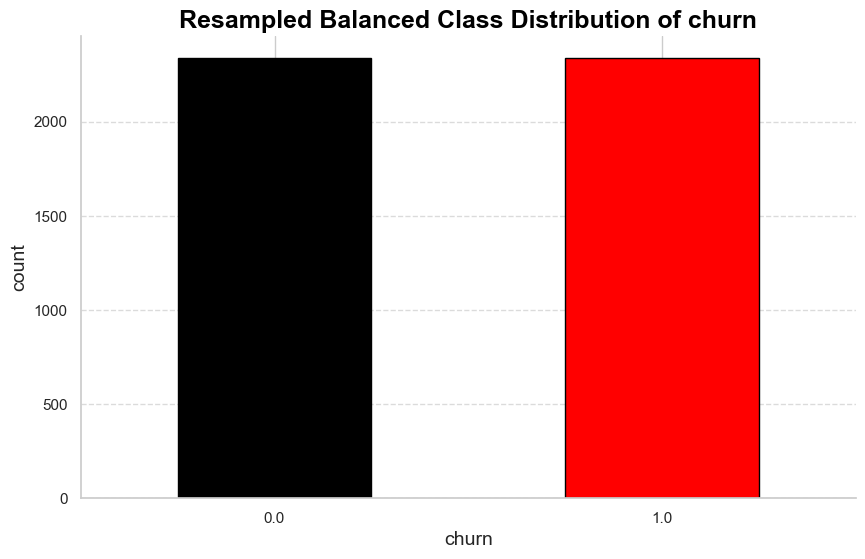

In [40]:
#Verify the resampled class distribution
resampled_class_counts = pd.Series(y_train_resampled).value_counts()
print("Resampled class distribution:\n", resampled_class_counts)

#Plotting the resampled class distribution
plt.figure(figsize=(10, 6))
resampled_class_counts.plot(kind='bar', color=['black','red'], edgecolor='black')
plt.title('Resampled Balanced Class Distribution of churn', fontsize=16, size=18, fontweight='bold', color='black')
plt.xlabel('churn', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

